<a href="https://colab.research.google.com/github/y109240/dataAnalysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EC%83%81%EC%B2%AD%EB%82%A0%EC%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 3. 공공데이터를 이용한 EDA 분석 - 기상청 데이터 분석

In [ ]:
# (코랩에서) 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

---

### #파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

---

### #라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [ ]:
# cloab matplotlib 한글폰트 지정
plt.rc('font', family='NanumBarunGothic')  # 코랩 폰트
plt.rc('font', family='Malgun Gothic')     # 윈도우 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호

In [2]:
# macOS에서 한글 적용하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
fe = fm.FontEntry(fname='r/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name="NanumGothic")
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size':13, 'font.family':'NanumGothic'})

---

### 1.데이터 준비하기

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용

---------

### 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기

In [3]:
filename = '기상청날씨데이터.csv'
df = pd.read_csv(filename, encoding='cp949')
df.head()

,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN


---

### 3.데이터 전처리하기 - 가공하기
- 함수 참고:  https://pandas.pydata.org/docs/reference/index.html

- 데이터 요약

In [4]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57026 entries, 0 to 57025
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  57026 non-null  int64  
 1   지점명                 57026 non-null  object 
 2   일시                  57026 non-null  object 
 3   평균기온(°C)            56396 non-null  float64
 4   최고기온(°C)            56828 non-null  float64
 5   최저기온(°C)            56803 non-null  float64
 6   평균현지기압(hPa)         54586 non-null  float64
 7   평균상대습도(%)           55829 non-null  float64
 8   월합강수량(00~24h만)(mm)  56733 non-null  float64
 9   평균풍속(m/s)           55865 non-null  float64
 10  합계 일조시간(hr)         55645 non-null  float64
 11  최심적설(cm)            12043 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.2+ MB


- 기술통계 정보

In [ ]:
df.describe()

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,57026.000000,56396.000000,56828.000000,56803.000000,54586.000000,55829.000000,56733.000000,55865.000000,55645.000000,12043.000000
mean,187.178252,12.623330,24.335518,2.002211,1005.793658,69.856526,110.508094,2.312255,188.562886,8.174907
std,62.234934,9.161795,8.017339,10.779243,16.161863,9.895235,121.270841,1.285750,46.155000,14.814384
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,8.000000,0.000000,-0.400000,0.000000,0.000000
25%,135.000000,4.600000,17.900000,-6.600000,1001.100000,63.000000,30.500000,1.400000,158.700000,1.500000
50%,174.000000,13.100000,25.800000,1.200000,1008.600000,71.000000,68.300000,2.000000,189.100000,4.300000
75%,245.000000,20.900000,31.100000,11.400000,1015.900000,77.000000,146.000000,2.900000,219.000000,9.000000
max,296.000000,30.200000,41.000000,24.800000,1029.700000,99.000000,1364.200000,22.700000,1300.300000,293.600000


#### **1. 결측데이터 시각화**
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공

In [ ]:
!pip install missingno

- **행에 결측 데이터 시각화**

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()
# 맥에서 폰트깨짐

- **열에 결측 데이터 시각화**

In [ ]:
msno.bar(df)
plt.show()
# 맥에서 폰트깨짐

---

#### **2. 컬럼명 변경하기**

In [5]:
# 컬럼명 변경하기
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
              '평균상대습도', '월합강수량', '평균풍속', '합계 일조시간','최심적설']
df.head()

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN


#### **3. 컬럼 추가하기 (df.insert())**
DataFrame.insert(추가하고싶은위치,컬럼명,값, allow_duplicate=False)

In [ ]:
# 인덱스 3 위치에 '신규'란 이름으로 df['지점'] 데이터를 그대로 추가하기
df.insert(3, '신규', df['지점'])
df.head(2)

,지점,지점명,일시,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
0,90,속초,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [ ]:
# 인덱스 3 위치에 '검색일자'란 이름으로 df['일시'] 데이터를 그대로 추가하기
df.insert(3, '검색일자', df['일시'])
df.head(2)

,지점,지점명,일시,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
0,90,속초,1968-01,1968-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968-02,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


In [6]:
# 인덱스 3 위치에 '년도'란 이름으로 '일시'컬럼에서 년도 부분만 컬럼 추가하기
df.insert(3, '년도', df['일시'].str[:4])
df.head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
0,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


- **문자열에서 특정 문자 제거**: '검색일자' 값중에 '년도-월' 형태로 되어 있는 구조에서  '-'기호를 제거

In [ ]:
df['검색일자']= df['검색일자'].str.replace(pat='-', repl='') # .replace('-', '')
df.head(2)

,지점,지점명,일시,년도,검색일자,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
0,90,속초,1968-01,1968,196801,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,196802,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


- **데이터형 변환하기**: str(object)-->int64 형으로 변환하기

In [ ]:
df['검색일자'] = df['검색일자'].apply('int64')
df['검색일자'].dtype
# str => int 변환하면 빨라짐

dtype('int64')

- **데이터형 변환하기**: int64 --> str(object)형으로 변환하기

In [ ]:
df['검색일자'] = df['검색일자'].apply(str)
df.dtypes

지점           int64
지점명         object
일시          object
년도          object
검색일자        object
신규           int64
평균기온       float64
최고기온       float64
최저기온       float64
평균현지기압     float64
평균상대습도     float64
월합강수량      float64
평균풍속       float64
합계 일조시간    float64
최심적설       float64
dtype: object

#### **4. 컬럼 삭제**

In [ ]:
# 앞에서 추가한 '신규', '검색일자' 컬럼 삭제하기
df.drop(['신규', '검색일자'], axis=1, inplace=True)
df.head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
0,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


#### **5. 특정 조건 검색**

- 지점명 총개수와 고유한 지점명

In [ ]:
# 지점명 총개수와 고유한 지점명
print("#지점명 총개수: ", len(df.지점명.unique()))
print("#고유한 지점명: ", df.지점명.unique())

#지점명 총개수:  104
#고유한 지점명:  ['속초' '북춘천' '철원' '동두천' '파주' '대관령' '춘천' '백령도' '북강릉' '강릉' '동해' '서울' '인천'
 '원주' '울릉도' '관악산' '수원' '영월' '충주' '서산' '울진' '청주' '대전' '추풍령' '안동' '상주' '포항'
 '군산' '대구' '전주' '울산' '창원' '광주' '부산' '통영' '무안' '목포' '여수' '흑산도' '완도' '고창'
 '순천' '진도(첨찰산)' '대구(기)' '홍성' '서청주' '제주' '고산' '성산' '서귀포' '진주' '강화' '양평'
 '이천' '인제' '홍천' '삼척' '태백' '정선군' '제천' '보은' '천안' '보령' '부여' '금산' '세종' '부안'
 '임실' '정읍' '남원' '장수' '고창군' '영광군' '김해시' '순창군' '북창원' '주암' '양산시' '보성군' '강진군'
 '장흥' '해남' '고흥' '의령군' '함양군' '성산포' '광양시' '진도군' '봉화' '영주' '문경' '청송군' '영덕'
 '의성' '구미' '영천' '경주시' '거창' '합천' '밀양' '산청' '거제' '남해' '북부산']


In [ ]:
# '2023'년도 데이터만 추출하여 df_2023으로 지정하기
df_2023 = df[df['년도'] == '2023']
df_2023.head(2)

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
660,90,속초,2023-01,2023,0.2,15.1,-16.0,1019.9,45.0,94.7,2.0,215.7,NaN
661,90,속초,2023-02,2023,2.7,15.6,-6.4,1022.3,53.0,43.4,1.9,186.6,NaN


In [ ]:
# '2023'년도 지점명 총개수와 고유한 지점명
print("#지점명 총개수: ", len(df_2023.지점명.unique()))
print("#고유한 지점명: ", df_2023.지점명.unique())

#지점명 총개수:  97
#고유한 지점명:  ['속초' '북춘천' '철원' '동두천' '파주' '대관령' '춘천' '백령도' '북강릉' '강릉' '동해' '서울' '인천'
 '원주' '울릉도' '수원' '영월' '충주' '서산' '울진' '청주' '대전' '추풍령' '안동' '상주' '포항' '군산'
 '대구' '전주' '울산' '창원' '광주' '부산' '통영' '목포' '여수' '흑산도' '완도' '고창' '순천' '홍성'
 '서청주' '제주' '고산' '성산' '서귀포' '진주' '강화' '양평' '이천' '인제' '홍천' '태백' '정선군' '제천'
 '보은' '천안' '보령' '부여' '금산' '세종' '부안' '임실' '정읍' '남원' '장수' '고창군' '영광군' '김해시'
 '순창군' '북창원' '양산시' '보성군' '강진군' '장흥' '해남' '고흥' '의령군' '함양군' '광양시' '진도군' '봉화'
 '영주' '문경' '청송군' '영덕' '의성' '구미' '영천' '경주시' '거창' '합천' '밀양' '산청' '거제' '남해'
 '북부산']


In [ ]:
# 2024-03월 측정 지점 개수
len(df[df.일시 == '2024-03']['지점명'].unique())

97

- **특정 컬럼명 검색** : 지점명=='제주' 데이터

In [ ]:
df[df.지점명 == '제주'].head()

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
28906,184,제주,1923-05,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
28907,184,제주,1923-06,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
28908,184,제주,1923-07,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
28909,184,제주,1923-08,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
28910,184,제주,1923-09,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN


- **또는(|) , 포함(in)** 조건 사용: '제주' 또는 '서귀포' 데이터 추출

In [ ]:
# 또는(|) 사용
df[(df.지점명=='제주') | (df.지점명=='고산') | (df.지점명=='성산') | (df.지점명=='성산포') | (df.지점명=='서귀포')]

# in사용
df.query(" 지점명 in ('제주','고산','성산','성산포','서귀포') ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
28906,184,제주,1923-05,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
28907,184,제주,1923-06,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
28908,184,제주,1923-07,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
28909,184,제주,1923-08,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
28910,184,제주,1923-09,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48517,265,성산포,2006-11,2006,14.3,24.1,4.9,1016.6,68.0,85.5,3.8,141.5,NaN
48518,265,성산포,2006-12,2006,8.5,17.3,0.2,1023.0,69.0,90.5,3.0,115.1,0.3
48519,265,성산포,2007-01,2007,6.9,14.6,0.6,1023.0,66.0,46.3,3.3,109.2,1.7
48520,265,성산포,2007-02,2007,9.1,17.7,0.5,1018.0,67.0,60.7,3.7,164.2,2.8


- **그리고(&)** 조건 사용

In [ ]:
# 측정지점이 서울권이면서 최고기온이 35도 보다 큰 경우
df[((df.지점명=='서울') | (df.지점명=='관악산')) & (df.최고기온 > 35)]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
5332,108,서울,1909-08,1909,25.3,35.6,19.8,NaN,77.0,216.1,3.7,173.3,NaN
5391,108,서울,1914-07,1914,26.1,35.6,19.4,NaN,84.0,289.1,2.7,204.4,NaN
5426,108,서울,1917-06,1917,21.5,36.7,9.7,NaN,68.0,72.0,2.5,257.9,NaN
5427,108,서울,1917-07,1917,25.7,36.6,17.7,NaN,81.0,223.9,2.2,274.2,NaN
5428,108,서울,1917-08,1917,24.8,36.6,16.4,NaN,78.0,299.7,2.5,243.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,108,서울,2019-08,2019,27.2,36.8,18.5,996.9,69.0,190.5,1.6,239.3,NaN
6647,108,서울,2020-06,2020,23.9,35.4,14.8,996.2,68.0,139.6,2.3,206.1,NaN
6660,108,서울,2021-07,2021,28.1,36.5,19.6,998.1,71.0,168.3,2.0,195.2,NaN
6672,108,서울,2022-07,2022,27.3,36.1,20.8,995.6,77.0,252.3,2.1,140.1,NaN


### **Q1. 우리나라 날씨측정 데이터(종관 데이터)의 최초 측정년도는?**

- **min()** : 최초 측정월, 마지막 측정월

In [ ]:
# 최초 측정월, 마지막 측정월
print("최초 측정일시: ", min(df.일시))
print("최초 측정일시: ", df.일시.min())

print("최근 측정일시: ", max(df.일시))
print("최근 측정일시: ", df.일시.max())

최초 측정일시:  1904-04
최초 측정일시:  1904-04
최근 측정일시:  2024-03
최근 측정일시:  2024-03


In [ ]:
# 최초 측정월을 입력으로 받아서 조건 검색하기
df[df.일시 == df.일시.min()]
df.query(f" 일시 == '{df.일시.min()}' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
6693,112,인천,1904-04,1904,NaN,19.2,6.4,NaN,NaN,104.9,NaN,NaN,NaN
22655,159,부산,1904-04,1904,NaN,21.4,4.7,NaN,NaN,172.9,NaN,NaN,NaN
24862,165,목포,1904-04,1904,NaN,20.2,NaN,NaN,NaN,34.7,NaN,NaN,NaN


- **max()** : 최근 측정 월 데이터 추출하기

In [ ]:
# 최근 측정 월 데이터 추출하기
df[df.일시 == df.일시.max()]
df.query(f" 일시 == '{df.일시.max()}' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
674,90,속초,2024-03,2024,5.7,20.6,-7.4,1015.2,58.0,58.6,2.2,212.9,NaN
764,93,북춘천,2024-03,2024,4.9,22.5,-11.3,1006.8,55.0,40.9,1.5,219.4,3.2
1199,95,철원,2024-03,2024,4.4,21.7,-11.9,999.8,63.0,42.4,1.6,221.1,NaN
1514,98,동두천,2024-03,2024,5.7,23.6,-10.2,1004.4,57.0,38.0,1.6,209.1,NaN
1781,99,파주,2024-03,2024,4.7,23.1,-10.5,1015.5,66.0,20.4,1.9,210.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55137,288,밀양,2024-03,2024,8.6,24.5,-5.6,1016.6,53.0,79.7,1.3,200.5,NaN
55760,289,산청,2024-03,2024,7.4,24.8,-8.1,1001.9,61.0,89.9,2.1,197.1,NaN
56384,294,거제,2024-03,2024,9.2,22.2,-4.1,1012.8,63.0,127.3,1.7,190.4,NaN
57010,295,남해,2024-03,2024,9.0,21.6,-5.1,1012.6,62.0,149.9,1.9,206.3,NaN


In [ ]:
# 지점명이 '제주'인 최근 측정 데이터
df[(df.지점명 == '제주') & (df.일시 == df.일시.max())]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
30116,184,제주,2024-03,2024,10.9,26.7,1.3,1016.0,62.0,98.1,3.7,159.8,NaN


In [ ]:
# 제주내의 지점들의 최근 측정 데이터
df.query(f" 지점명 in ('제주','고산','성산','성산포','서귀포') & 일시 == '{df.일시.max()}' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,최심적설
30116,184,제주,2024-03,2024,10.9,26.7,1.3,1016.0,62.0,98.1,3.7,159.8,NaN
30551,185,고산,2024-03,2024,10.4,17.9,1.2,1009.6,72.0,74.8,7.0,151.2,NaN
31605,188,성산,2024-03,2024,10.3,20.0,-0.1,1016.2,70.0,135.7,3.4,172.7,NaN
32364,189,서귀포,2024-03,2024,11.1,19.3,0.7,1012.3,67.0,155.5,1.9,193.5,NaN


### **Q2. 우리나라에서 가장 더웠던 온도와 년월, 지역은?**

In [ ]:
# 컬럼 추출
df[df.최고기온 == df.최고기온.max()][['지점명', '일시', '최고기온']]

# 행 추출
df[df.최고기온 == df.최고기온.max()]

In [ ]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명'].iloc[0]

In [8]:
# 행 추출 특정 컬럼값(년월) 추출
yymm = df[df.최고기온==df.최고기온.max()]['일시']
print(f"기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}")

# 행 추출 특정 컬럼값(최고기온) 추출
maxtemp = df[df.최고기온==df.최고기온.max()]['최고기온']
print(f"기상관측 데이터를 통해 가장 더웠던 날 온도: {maxtemp}")

기상관측 데이터를 통해 가장 더웠던 년-월: 36123    2018-08
Name: 일시, dtype: object
기상관측 데이터를 통해 가장 더웠던 날 온도: 36123    41.0
Name: 최고기온, dtype: float64


### **Q3. 우리나라에서 가장 추웠던 온도와 년월, 지역은?**

In [9]:
df[df.최저기온==df.최저기온.min()][['최저기온', '일시', '지점명']]

,최저기온,일시,지점명
33775,-32.6,1981-01,양평


### **Q4. 제주에서 가장 더웠던/추웠던 온도와 년월은?**

In [20]:
# 제주에서 가장 더웠던 데이터
df_jeju = df[(df.지점명=='제주')]
df_jeju[(df_jeju.최고기온==df_jeju.최고기온.max())][['지점명', '일시', '최고기온', '최저기온']]
# 제주에서 가장 추웠던 데이터
df_jeju = df[(df.지점명=='제주')]
df_jeju[(df_jeju.최저기온==df_jeju.최저기온.min())][['지점명', '일시', '최고기온', '최저기온']]

      지점명       일시  최고기온  최저기온
29136  제주  1942-07  37.5  17.8
30097  제주  2022-08  37.5  21.2
      지점명       일시  최고기온  최저기온
29551  제주  1977-02  17.5  -6.0


### **[실습문제] 서울에서 가장 더웠던/추웠던 온도와 년월은?**

In [21]:
df_seoul = df[df.지점명 == '서울']

# 서울에서 최고기온
df_seoul[df_seoul.최고기온==df_seoul.최고기온.max()][['지점명', '일시', '최고기온', '최저기온']]
# 서울에서 최저기온
df_seoul[df_seoul.최저기온==df_seoul.최저기온.min()][['지점명', '일시', '최고기온', '최저기온']]

     지점명       일시  최고기온  최저기온
6625  서울  2018-08  39.6  20.2
     지점명       일시  최고기온  최저기온
5552  서울  1927-12  10.2 -23.1


## [질문]
- **Q1. 우리나라 날씨측정 데이터(종관 데이터)의 최초 측정년도는?**
- **Q2. 우리나라에서 가장 더웠던 온도와 년월, 지역은?**
- **Q3. 우리나라에서 가장 추웠던 온도와 년월, 지역은?**
- **Q4. 제주에서 가장 더웠던/추웠던 온도와 년월은?**
- **Q5. 지점별 최고기온/최저기온은?**
- 등등

In [23]:
# 특정 행을 추출할수는 있는데 그 행중에서 특정 값을 추출하려면?

# 1.
df[df.일시 == df.일시.min()]['일시']

# 2.
df[df.최고기온 == df.최고기온.max()][['지점명', '최고기온', '일시']]
# df[df.최고기온 == df.최고기온.max()].loc[['지점명', '최고기온', '일시']] # loc으로는 어떻게 추출하지?

# 3.
df[df.최저기온 == df.최저기온.min()][['지점명', '최저기온', '일시']]

# 4.
df_jeju = df[(df.지점명=='제주')]
df_jeju[(df_jeju.최고기온==df_jeju.최고기온.max())][['지점명', '최고기온', '일시']]
df_jeju[(df_jeju.최저기온==df_jeju.최저기온.min())][['지점명', '최저기온', '일시']]

# 5. 필요한 정보만 dict형태로 만들어보기
df.groupby('지점명').max(numeric_only=True)
df.groupby('지점명').min(numeric_only=True)

      지점  평균기온  최고기온  최저기온  평균현지기압  평균상대습도   월합강수량  평균풍속  합계 일조시간   최심적설
지점명                                                                     
강릉   105  28.5  39.4  20.9  1028.1    91.0  1137.0   8.9    325.7  138.1
강진군  259  27.8  37.4  21.7  1026.0    90.0   562.6   3.6    296.5   36.5
강화   201  26.7  35.8  20.3  1026.2    96.0  1069.0   3.0    374.2   30.3
거제   294  28.3  38.6  23.5  1029.1    92.0  1115.5   4.2    318.4   19.6
거창   284  27.7  37.8  21.0   999.9    89.0   838.0   2.5    315.4   32.0
..   ...   ...   ...   ...     ...     ...     ...   ...      ...    ...
합천   285  29.0  39.5  21.9  1028.3    89.0   814.5   2.7    323.6   24.8
해남   261  27.7  37.2  23.7  1025.6    94.0   724.2   3.4    343.2   38.5
홍성   177  27.6  37.0  21.3  1024.5    92.0   562.2   2.3    342.8   17.9
홍천   212  27.5  41.0  20.6  1010.9    88.0  1244.5   1.8    338.2   33.3
흑산도  169  27.3  34.9  22.3  1017.7    99.0   624.8   8.9    301.4   18.7

[104 rows x 10 columns]
      지점  평균기온  최고기온  최저기온

--------

#### **6. 그룹핑(Grouping)**

#### #그룹핑: 지점별  

In [ ]:
# 지점명별 숫자 컬럼의 평균값
df.groupby('지점명').mean(numeric_only=True)

In [ ]:
# 지점명별 해당 컬럼의 데이터 빈도수
df.groupby('지점명').count() # 인덱스를 지점명 그대로 사용
df.groupby('지점명').count().reset_index() # 인덱스를 지점명이 아닌 새롭게 카운트
df.groupby(['지점명'], as_index=False).count() # 인덱스를 지점명이 아닌 새롭게 카운트

#### #그룹핑(컬럼1개): 지점별  평균기온

In [ ]:
# 방법1
df['평균기온'].groupyby(df['지점명']).mean()

In [ ]:
# 방법2
df.groupby('지점명')['평균기온'].agg('mean')

In [ ]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})

<Axes: xlabel='지점명'>

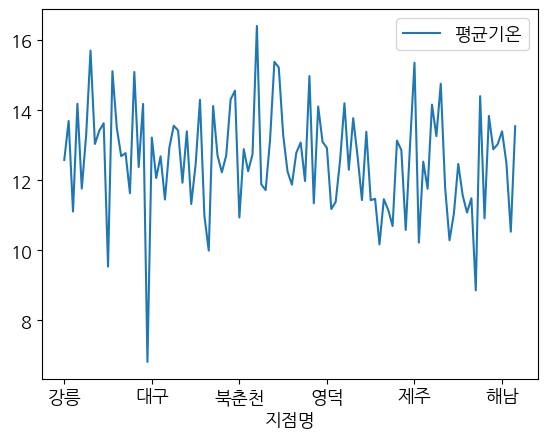

In [ ]:
# 그래프 그리기
df.groupby('지점명').aggregate({'평균기온':'mean'}).plot()

In [ ]:
# 지점명별 평균기온, 최고기온, 최저기온 그룹핑하기
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean',
                                '최고기온':'max',
                                '최저기온':'min'})

#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [5]:
df.groupby(['지점명', '년도'])['평균기온'].agg('mean')
df.groupby(['지점명', '년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명', '년도']).aggregate({'평균기온':'mean'})
df.groupby(['지점명', '년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index()

,지점명,년도,평균기온
0,강릉,1911,NaN
1,강릉,1912,11.733333
2,강릉,1913,11.683333
3,강릉,1914,13.175000
4,강릉,1915,12.091667
...,...,...,...
4844,흑산도,2020,14.100000
4845,흑산도,2021,15.258333
4846,흑산도,2022,13.983333
4847,흑산도,2023,14.308333


<Axes: xlabel='지점명,년도'>

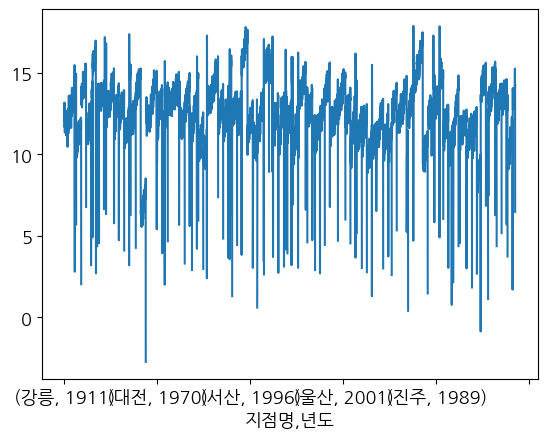

In [6]:
# 선그래프 그리기
df.groupby(['지점명', '년도'])['평균기온'].agg('mean').plot()

### **Q5. 지점별 최고기온/최저기온은?**

In [ ]:
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})
df.groupby('지점명').aggregate({'최고기온':'max',
                             '최저기온':'min'})

- 인텍스를 초기화 하는 방법

In [ ]:
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

### [실습문제] : 지점별 년도별 최다 월합강수량?

In [17]:
df.groupby(['지점명', '년도'])['월합강수량'].agg(**{'최다월합강수량':'max'})
df.groupby(['지점명', '년도']).aggregate({'월합강수량':'max'})

월합강수량
지점명 년도         
강릉  1911   36.5
    1912  346.1
    1913  232.5
    1914  383.4
    1915  302.3
...         ...
흑산도 2020  305.2
    2021  176.0
    2022  131.4
    2023  590.5
    2024  102.3

[4849 rows x 1 columns]

### [실습문제]  제주 전역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

In [18]:
df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명', '년도']).aggregate({'최고기온':'max',
                                            '최저기온':'min',
                                            '월합강수량':'max',
                                            '최심적설':'max'})
df2.to_csv('제주_년도별_날씨정보.csv', encoding='utf-8')
df2.head()

최고기온  최저기온  월합강수량  최심적설
지점명 년도                           
고산  1988  30.5  -2.1  207.4   0.5
    1989  30.5  -1.0  273.2   0.3
    1990  32.4  -3.5  205.8   2.7
    1991  31.4  -3.0  368.2   1.0
    1992  31.7   0.2  326.6   NaN

#### 6.가공된 파일 신규 저장하기

In [ ]:
# 가공된 데이터 신규 파일로 저장하기
outfile = 'weather_data.csv'
df.to_csv(outfile, encoding='cp949', mode='w', index=True)

--------------------------

## 4. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

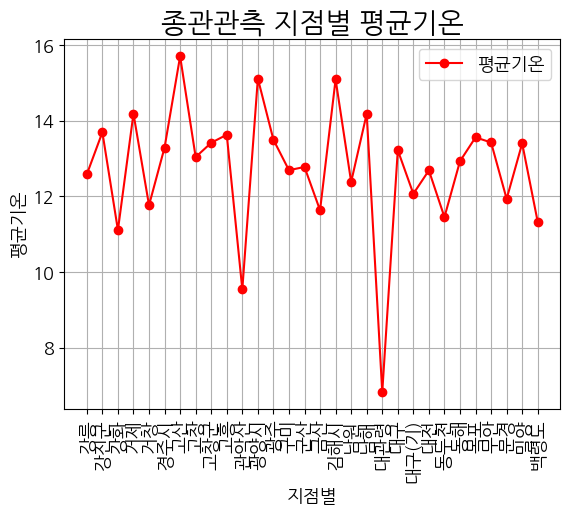

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
filename = '기상청날씨데이터.csv'
df = pd.read_csv(filename, encoding='cp949')

# 2. 칼럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기업', '평균상대습도', '월합강수량', '평균풍', '일조시간', '최심적설']
df['년도'] = df.일시.str[0:4]
df.head(2)

# 3. 지점별 평균 구하기(지점 30개만 추출)
df_30 = df.groupby('지점명').aggregate({'평균기온':'mean'}).head(30)

plt.figure()
plt.plot(df_30, marker='o', linestyle='solid', c='red', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점별'); plt.ylabel('평균기온');
plt.legend(); plt.grid();
plt.savefig('./지점별그래프.png')
plt.show()


### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

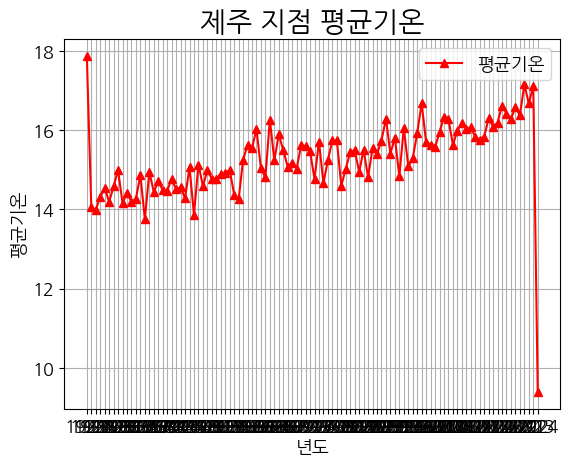

In [8]:
# 제주 지점 연도별 그룹핑하기
df_jeju = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df_jeju = df_jeju.groupby(['년도']).aggregate({'평균기온':'mean'}).reset_index()
x = df_jeju.년도
y = df_jeju.평균기온

# 제주 지점 평균 구하기
plt.plot(x, y, '^', linestyle='solid', c='r', label='평균기온')
plt.title('제주 지점 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.legend()
plt.grid()
plt.show()

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

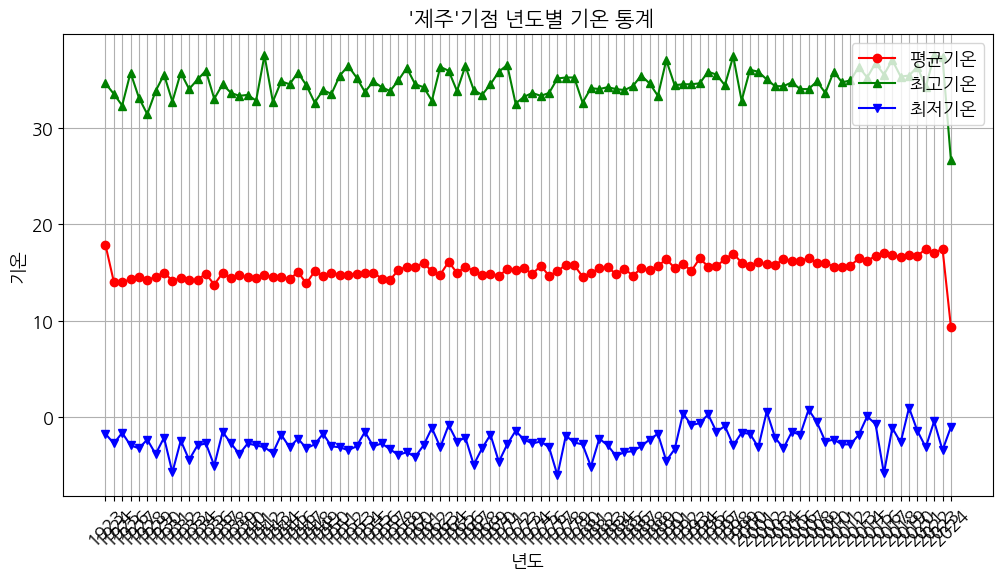

In [10]:
# '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 그래프로 시각화하기
plt.figure(figsize=(12,6))
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온')
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title(" '제주'기점 년도별 기온 통계", fontsize=15)
plt.xlabel('년도')
plt.ylabel('기온')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()

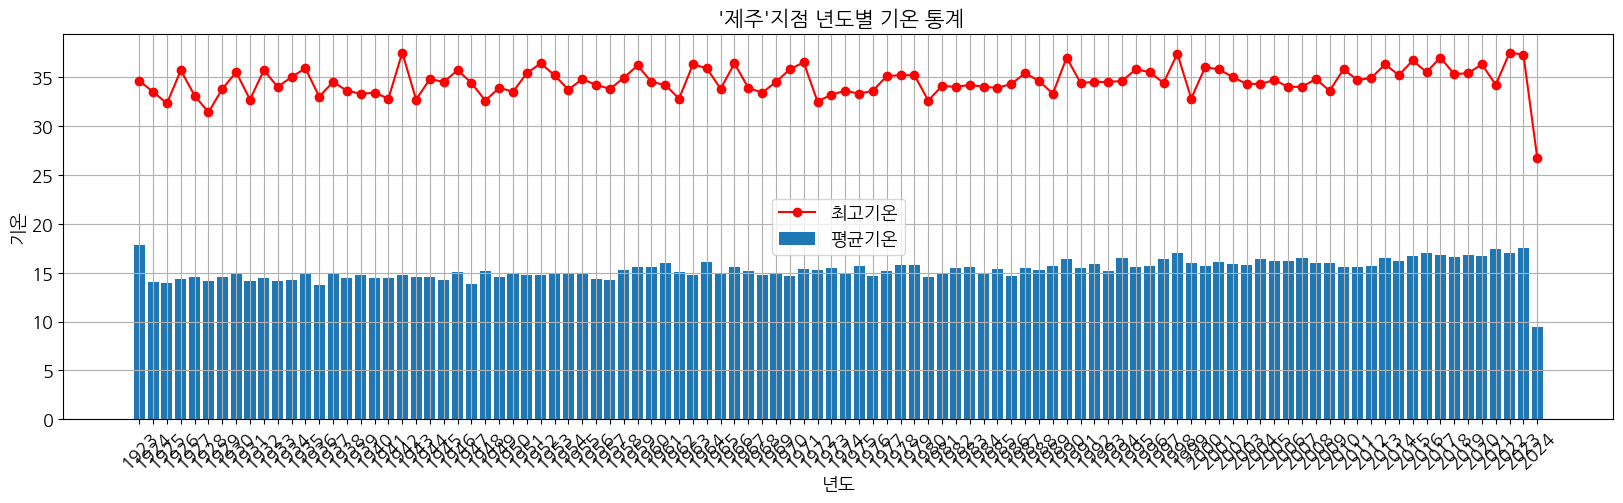

In [20]:
# '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
# data = df[df.지점명 == '제주']
data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 그래프로 시각화하기
x = data1['년도']
y1 = data1['평균기온']
y2 = data2['최고기온']
plt.figure(figsize=(20,5))
plt.bar(x, y1, label='평균기온')
plt.plot(x, y2, 'o', linestyle='solid', c='r', label='최고기온')
plt.title(" '제주'지점 년도별 기온 통계", fontsize=15)
plt.xlabel('년도')
plt.ylabel('기온')
plt.legend()
plt.grid()
plt.xticks(rotation=45)

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

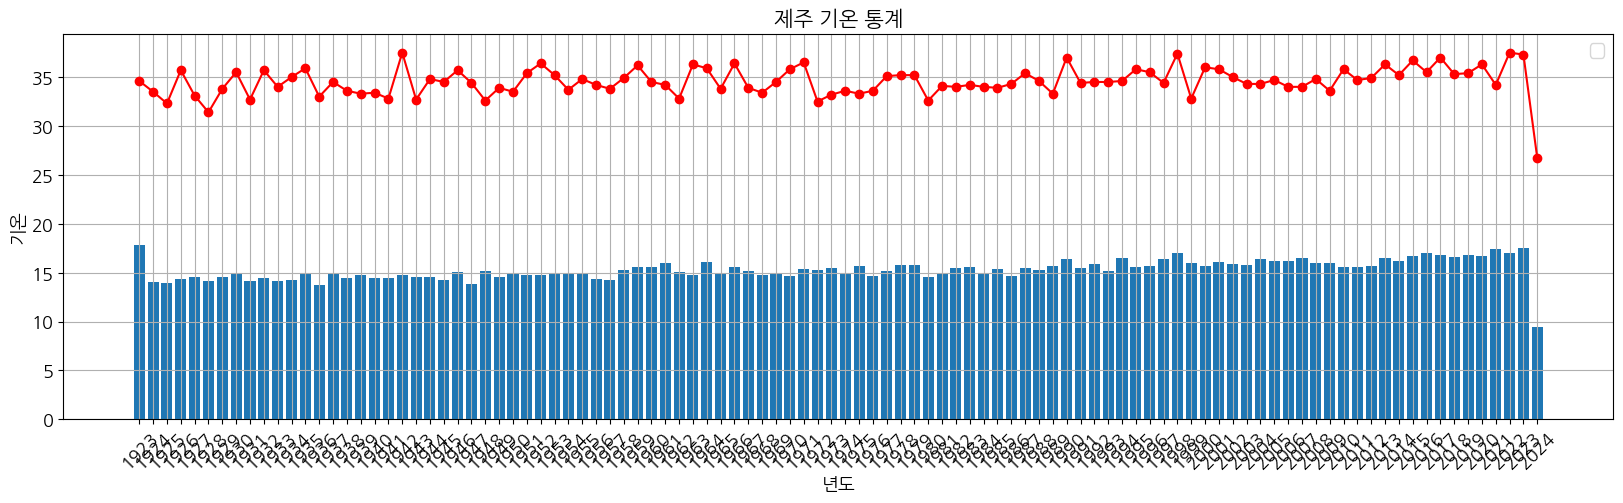

In [16]:
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)
plt.legend(['최고기온','평균기온'])
plt.xlabel('년도')
plt.ylabel('기온')
plt.xticks(rotation=45)
plt.grid()

plt.bar(x, y1)
plt.plot(x, y2, 'o', linestyle='solid', c='r')
plt.show()

### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량

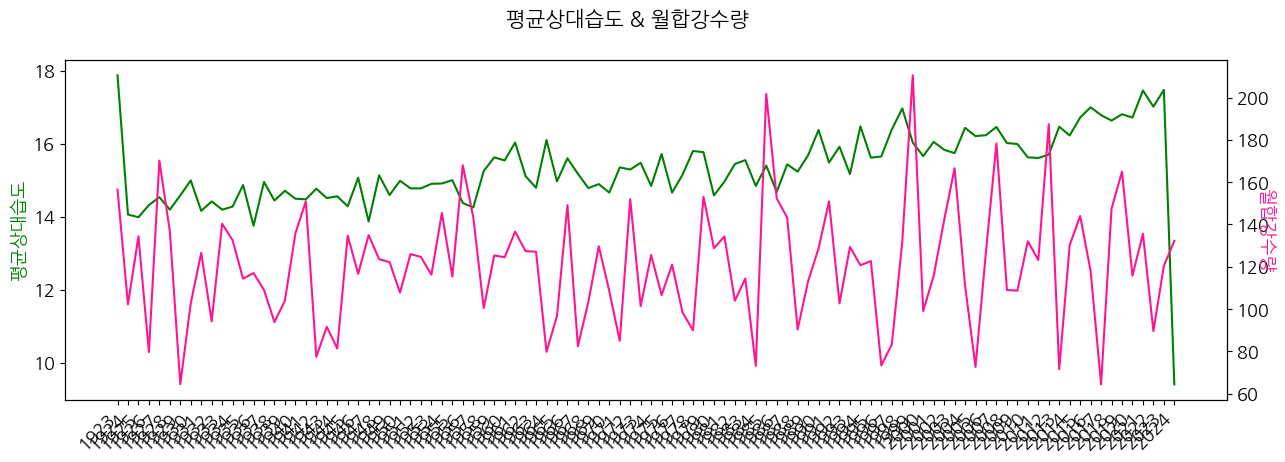

In [27]:
data = df.groupby(['지점명', '년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
x = data['년도']
y = data['평균상대습도']

data =df.groupby(['지점명', '년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
y2 = data['월합강수량']

# 그래프로 시각화하기
# 왼쪽 축 그래프 (평균상대습도)
fig, ax1 = plt.subplots(figsize=(15,5))
plt.suptitle('평균상대습도 & 월합강수량', fontsize=15)
ax1.plot(x, y1, color='green')
ax1.set_ylabel('평균상대습도', color='green', rotation=90)
# 오른쪽 축 그래프 (월합강수량)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')
ax2.set_ylabel('월합강수량', color='deeppink', rotation=270)

fig.autofmt_xdate(rotation=45)
plt.savefig('graph.png')
plt.show()

-------

---------

끝!